In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights='imagenet', include_top=True)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# 224 * 224 * 3  : 150528   ->  25088

150528

(224, 224, 3)
float32


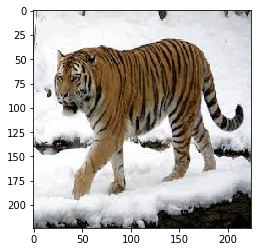

In [28]:
img_path = 'tiger.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img) # 0 ~ 255
print(x.shape)
print(x.dtype)
plt.imshow(x/255.0)

In [29]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [30]:
x = preprocess_input(x)

In [15]:
print(x.shape)

(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


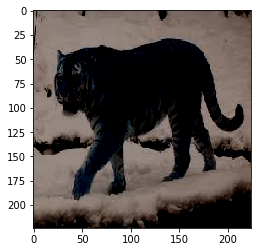

In [31]:
#print(x)
plt.imshow( x[0,:,:,:] / 255.0)

In [32]:
pred = model.predict(x)

(1, 1000)


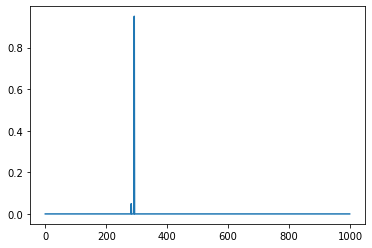

In [33]:
print(pred.shape)
plt.plot(pred[0,:])

In [34]:
print(np.argmax(pred))

292


In [54]:
r = decode_predictions(pred, top=3)[0]
print(r[0][1], r[0][2])

tiger 0.95088625


In [50]:
import json
json_data = json.load(open('imagenet_class_index.json'))
#print(json_data)
print(json_data["292"])

['n02129604', 'tiger']


In [53]:
json_data[f"{np.argmax(pred)}"][1]

'tiger'

In [65]:
img = cv2.imread('tiger.jpg')
img = cv2.resize(img, (224, 224))
img  = img.reshape(-1, 224, 224, 3)
print(img.shape)
img = preprocess_input(img)
pred = model.predict(img)
json_data[f"{np.argmax(pred)}"][1]

(1, 224, 224, 3)


'tiger'

In [81]:
# pip install googletrans
from googletrans import Translator
translator = Translator()
result = translator.translate('spotted salamander', dest="ko")
print(result.text)

더럽혀진 도롱뇽


In [82]:
def toKor(word) :
    word = word.replace("_", " ")
    translator = Translator()
    result = translator.translate(word, dest="ko")
    return result.text

In [75]:
result = toKor(json_data[f"{np.argmax(pred)}"][1])
print(result)

호랑이


In [ ]:
import time
hdict = []
for d in json_data :
    k = toKor(json_data[d][1])
    hdict.append(k)
    print(json_data[d][1], k)
    time.sleep(0.3)

In [111]:
import pickle
with open("hdict.bin","wb") as fw:
    pickle.dump(hdict, fw)

with open("hdict.bin","rb") as fr:
    hdict2 = pickle.load(fr)
print(hdict2)

['텐치', '금붕어', '백상아리', '범 상어', '귀상어', '전기 광선', '가오리', '수탉', '대단히', '타조', '불평', '금화', '집 핀치', '돌진', '인디고 깃발 천', '남자 이름', '벌불', '어치', '까치', '총칭', '물 우젤', '연', '대머리 독수리', '무자비한 사람', '큰 회색 올빼미', '유럽식 불 도롱뇽', '일반적인 영원', '이다', '더럽혀진 도롱뇽', 'Axolotl', '황소 개구리', '청개구리', '꼬리 개구리', '얼간이', '가죽 등 거북이', '진흙 거북', '테라 핀', '상자 거북', '줄무늬 게코', '일반적인 이구아나', '미국 카멜레온', '채찍 꼬리', '종교', '주름진 도마뱀', '악어 도마뱀', '미친 괴물', '녹색 도마뱀', '아프리카 카멜레온', '코모도 왕 도마뱀', '아프리카 악어', '미국 악어', '트리케라톱스', '천둥 뱀', '링넥 뱀', '돼지 뱀', '녹색 뱀', '왕 뱀', '가터 뱀', '물뱀', '포도 나무 뱀', '밤뱀', '좋은 압축', '바위 비단뱀', '인도 코브라', '그린 맘바', '바다뱀', '뿔이있는 독사', '다이아몬드 백', '사이드 와인 더', '삼엽충', '수확 자', '투석기', '검정색과 금색 정원 거미', '어린이 거미', '정원 거미', '블랙 위도우', '타란툴라 거미', '늑대 거미', '진드기', '지네', '검은 뇌조', '멧닭', '주름진 뇌조', '프레리 치킨', '공작', '메추라기', '자고', '아프리카 그레이', '앵무새', '유황 볏 앵무새', '진훙 잉꼬', '쿠칼', '꿀벌 먹는 사람', '코뿔새', '벌새', 'Jasmer', '큰 부리 새', '드레이크', '붉은 가슴의 인어', '거위', '검은 백조', '투스 커', '바늘 두더지', '오리너구리', '왈라비', '코알라', '웜뱃', '해파리', '말미잘', '뇌 산호', '편충', '선충류', '조가비', '달팽이', '강타', '바다 슬

In [84]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

model2 = ResNet50(weights='imagenet')

In [89]:
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [90]:
img = cv2.imread('tiger.jpg')
img = cv2.resize(img, (224, 224))
img  = img.reshape(-1, 224, 224, 3)
print(img.shape)
img = preprocess_input(img)
pred = model2.predict(img)
r = json_data[f"{np.argmax(pred)}"][1]
r = toKor(r)
print(r)

(1, 224, 224, 3)
호랑이


In [91]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

model3 = InceptionV3(weights='imagenet')

In [ ]:
model3.summary()

In [ ]:
img = cv2.imread('result.jpg')
img = cv2.resize(img, (299, 299))
img  = img.reshape(-1, 299, 299, 3)
print(img.shape)

In [106]:
%%time
img = preprocess_input(img)
pred = model3.predict(img)

Wall time: 124 ms


In [105]:
r = json_data[f"{np.argmax(pred)}"][1]
r = toKor(r)
print(r)

디지털 시계


In [127]:
%%writefile server.py

import flask
from flask import Flask,render_template,url_for,request
import base64
import numpy as np
import cv2
from keras.models import load_model 
import io 
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
import json
import tensorflow as tf
from keras import backend as K
import pickle


init_Base64 = 22   # data:image/png;base64, 로 시작하
app = Flask(__name__)

global model 
global sess
global graph

sess = tf.Session()       
graph = tf.get_default_graph() 
K.set_session(sess)

model = ResNet50(weights='imagenet')
with open("hdict.bin","rb") as fr:
    hdict = pickle.load(fr)

@app.route('/')
def home():
    return "ok~~~"


@app.route('/image', methods=['POST'])
def upload():       
    draw = request.form['photo_cap']
    draw = draw[init_Base64:]
    draw_decoded = base64.b64decode(draw)
    image = np.asarray(bytearray(draw_decoded), dtype="uint8")
    
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)    
    image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_AREA)                
    image = image.reshape(-1, 224, 224, 3)
    image = preprocess_input(image)
    
    with graph.as_default():
        K.set_session(sess)
        pred = model.predict(image)
        r = hdict[np.argmax(pred)]
        
    return f"인식결과:{r}"
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)

Overwriting server.py


In [124]:
with open("hdict.bin","rb") as fr:
    hdict = pickle.load(fr)
print(hdict[192])

케른
